# Машинное обучение, ФКН ВШЭ

# Практическое задание 1

## Общая информация

Дата выдачи: 16.09.2016

Срок сдачи: 30.09.2016 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на hse.cs.ml+<номер группы>@gmail.com (например, hse.cs.ml+141@gmail.com для студентов группы БПМИ-141).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [498]:
import numpy as np
import matplotlib as plt
import seaborn as sns

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [31]:
def max_element(arr):
    zero_indices = np.where(arr[:-1] == 0)[0]

    if zero_indices.size == 0:
        return None
    
    return arr[zero_indices + 1].max()

    
     

In [73]:
max_element(np.array([6, 2, 5, 7, 0]))

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [78]:
def nearest_value(X, v):
    X = X.reshape(-1)
    dist = (X - v) ** 2
    return X[np.argmin(dist)]


In [79]:
nearest_value(np.arange(0,10).reshape((2, 5)), 3.6)

np.int64(4)

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [150]:
def scale(X):
    std = np.std(X, axis=0)
    std[std == 0] = 1
    return (X - np.mean(X, axis=0)) / std


In [152]:
X = np.arange(0,10).reshape((2, 5))
print(scale(X))



[[-1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [173]:
X = np.random.normal(loc=10, scale=1, size=16).reshape((4, 4))
print(X)

det = np.linalg.det(X)

trace = np.trace(X)

min_el, max_el = np.min(X), np.max(X)

frob_norm = np.linalg.norm(X, ord='fro')

sobstv = np.linalg.eigvals(X)

invariance = np.linalg.inv(X)


[[10.54443489 10.30874759 10.0932864  10.6843547 ]
 [10.33100595  8.76990387  7.96868351  9.21404606]
 [10.00712327 10.49384228 10.88837154  9.64591045]
 [11.14456531 10.3232393   9.75820464 10.27312109]]


In [ ]:
def get_stats(X):


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [184]:
# for exp_num in range(100):
#     matr_1 = np.random.normal(loc=15, scale=2, size=100).reshape((10, 10))
#     matr_2 = np.random.normal(loc=7, scale=2, size=100).reshape((10, 10))

#     res = np.matmul(matr_1, matr_2)
#     print(res)
#     print()
#     print(f'max_element: {np.max(res)}')
#     print(f'mean_by_experiment {np.mean(res, axis=1)}')
#     print(f'95 quantile: {np.percentile(res, 95, axis=1)}')


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

In [ ]:
df.

In [185]:
import pandas as pd
%matplotlib inline

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [517]:
df = pd.read_csv('2008.csv')

In [518]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [519]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [520]:
df['CancellationCode'].value_counts()

CancellationCode
A    563
B    549
C    299
Name: count, dtype: int64

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [20]:
df['Distance'].describe()

count    70000.000000
mean       724.508257
std        565.485009
min         31.000000
25%        324.000000
50%        575.000000
75%        950.000000
max       4962.000000
Name: Distance, dtype: float64

**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [22]:
df[df['Distance'] == 31]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1116,2008,12,30,2,1123.0,1007,1148.0,1033,AS,65,...,6.0,6.0,0,NaN,0,0.0,75.0,0.0,0.0,0.0
6958,2008,12,26,5,NaN,1007,NaN,1033,AS,65,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
17349,2008,8,18,1,NaN,1737,NaN,1801,AS,64,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
27534,2008,3,11,2,1611.0,1537,1630.0,1605,AS,64,...,4.0,5.0,0,NaN,0,0.0,25.0,0.0,0.0,0.0
46082,2008,8,9,6,1103.0,1036,1139.0,1100,AS,65,...,4.0,24.0,0,NaN,0,0.0,0.0,12.0,0.0,27.0
48112,2008,2,28,4,1535.0,1537,1603.0,1605,AS,64,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [24]:
df[df['FlightNum'] == 65]['Distance']

1116       31
1517      680
6326       82
6958       31
10113     571
14646    2454
15173    1005
26025     581
26109     571
26824    1747
32173    1747
32956    2454
33211    1005
37350      82
39438     571
43132     123
45031      82
46082      31
47168     581
47716     281
49369     682
50184     372
50888      82
50910     372
51841    1747
52459     581
52618     680
52779    1747
54909     581
57730    1747
57822    1747
59015    1005
64203      82
65662     123
66042     372
66529      82
68264     386
68338    2454
69305    1005
Name: Distance, dtype: int64

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [ ]:
# Your code here

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [ ]:
# Your code here

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [ ]:
# Your code here

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [544]:
df = pd.read_csv('2008.csv')

In [545]:
# Сколько пропусков в каждом признаке
df.isna().sum().sort_values(ascending=False)

CancellationCode     68589
LateAircraftDelay    54747
SecurityDelay        54747
NASDelay             54747
WeatherDelay         54747
CarrierDelay         54747
ActualElapsedTime     1582
AirTime               1582
ArrDelay              1582
TaxiIn                1556
ArrTime               1556
TaxiOut               1406
DepTime               1399
DepDelay              1399
TailNum                820
CRSElapsedTime           9
Cancelled                0
DayofMonth               0
DayOfWeek                0
CRSDepTime               0
Diverted                 0
FlightNum                0
Distance                 0
Dest                     0
Origin                   0
Month                    0
CRSArrTime               0
UniqueCarrier            0
Year                     0
dtype: int64

In [546]:
# Количество объектов, у которых есть хотя бы один пропуск
df.isna().any(axis=1).sum()

np.int64(70000)

In [547]:
df.dropna(subset=['DepDelay'], inplace=True)
df.drop(columns=['CancellationCode', 
           'LateAircraftDelay', 'SecurityDelay',
           'NASDelay', 'WeatherDelay',
           'CarrierDelay'], inplace=True)

In [548]:
df.isna().sum().sort_values(ascending=False)


ActualElapsedTime    183
ArrDelay             183
AirTime              183
TaxiIn               157
ArrTime              157
TaxiOut                7
CRSElapsedTime         5
Cancelled              0
Distance               0
Dest                   0
Origin                 0
DepDelay               0
Year                   0
Month                  0
TailNum                0
FlightNum              0
UniqueCarrier          0
CRSArrTime             0
CRSDepTime             0
DepTime                0
DayOfWeek              0
DayofMonth             0
Diverted               0
dtype: int64

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [549]:
target = df['DepDelay']
# df.drop(columns=['DepDelay'], inplace=True)

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [550]:
import math

def get_time_hhmm(abcd, hh=True):
    
    if abcd is None or (isinstance(abcd, float) and math.isnan(abcd)):
        return None
    
    abcd = int(abcd)
    abcd = str(abcd)
    
    while len(abcd) <= 3:
        abcd = '0' + abcd
    hhmm_list = [x for x in str(abcd)]
    if hh == True:
        hh = int(''.join(hhmm_list[0:2]))
        return hh
    else:
        mm = int(''.join(hhmm_list[3:5]))
        return mm

In [551]:
for feature in ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']:
    if feature in df.columns:
        df[f'{feature}_Hour'] = df[feature].apply(lambda x: get_time_hhmm(x, hh=True))
        df[f'{feature}_Minute'] = df[feature].apply(lambda x: get_time_hhmm(x, hh=False))
        df.drop(columns=[feature], inplace=True)

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [ ]:
df.drop(columns=['Year', 'TailNum'], inplace=True)

In [ ]:
# Коэффициент корреляции Пирсона с таргетом около 0.9 (исключаем данный признак)
df.drop(columns=['ArrDelay'], inplace=True)

In [553]:
df.corr(numeric_only=True)

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,...,Cancelled,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
Month,1.000000,-0.004535,-0.011494,0.006140,-0.012743,-0.004369,-0.011421,-0.040420,-0.027598,-0.004735,...,0.019147,0.001064,-0.008075,0.001449,-0.006156,0.021463,-0.002221,-0.003486,0.003049,-0.005766
DayofMonth,-0.004535,1.000000,0.014203,0.008866,-0.006916,-0.005958,-0.006675,0.006154,0.008002,-0.005968,...,-0.003119,0.002070,0.001781,0.001919,0.002350,-0.004017,-0.001242,0.008637,0.001152,0.002890
DayOfWeek,-0.011494,0.014203,1.000000,-0.006192,0.012766,0.015406,0.013594,0.002958,0.008023,0.016653,...,0.000500,0.005404,0.005237,0.001387,0.004868,0.006223,0.005309,0.002852,0.005675,-0.004320
FlightNum,0.006140,0.008866,-0.006192,1.000000,-0.320674,-0.328347,-0.335133,0.024006,0.015708,-0.349606,...,0.016410,0.000104,-0.004726,-0.039017,-0.011698,0.037656,-0.019027,-0.012528,-0.030858,0.011281
ActualElapsedTime,-0.012743,-0.006916,0.012766,-0.320674,1.000000,0.980268,0.984555,0.089112,0.041170,0.965309,...,NaN,NaN,-0.014899,0.014993,-0.014513,-0.006677,0.036752,0.007766,0.054867,0.018864
CRSElapsedTime,-0.004369,-0.005958,0.015406,-0.328347,0.980268,1.000000,0.988309,0.009150,0.033920,0.983403,...,-0.007167,0.020524,-0.012037,0.015869,-0.009563,-0.007612,0.037798,0.008376,0.060603,0.014950
AirTime,-0.011421,-0.006675,0.013594,-0.335133,0.984555,0.988309,1.000000,0.030910,0.025105,0.983241,...,NaN,NaN,-0.020909,0.016631,-0.018570,-0.010310,0.029905,0.008657,0.047612,0.007847
ArrDelay,-0.040420,0.006154,0.002958,0.024006,0.089112,0.009150,0.030910,1.000000,0.930046,0.003340,...,NaN,NaN,0.176188,0.001058,0.116480,0.013704,0.062024,-0.010659,0.112643,0.006793
DepDelay,-0.027598,0.008002,0.008023,0.015708,0.041170,0.033920,0.025105,0.930046,1.000000,0.024383,...,-0.000808,0.024980,0.198260,0.002959,0.137209,0.012960,0.069761,-0.010208,0.132789,0.000030
Distance,-0.004735,-0.005968,0.016653,-0.349606,0.965309,0.983403,0.983241,0.003340,0.024383,1.000000,...,-0.007604,0.017103,-0.014135,0.018770,-0.009471,-0.010765,0.028328,0.008973,0.050027,0.006304


<Axes: >

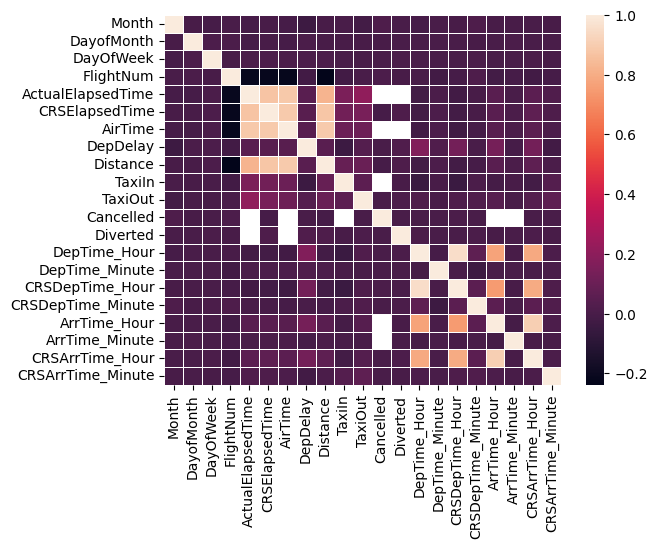

In [559]:
sns.heatmap(df.corr(method='kendall', numeric_only=True), linewidth=.5)

**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [ ]:
X['DepTime_Hour'].hist(bins=20)

In [ ]:
X['TaxiIn'].hist(bins=20)

In [ ]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [ ]:
def transform_data(data):
    # Your code here

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [ ]:
# Your code here

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [ ]:
# Your code here

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
# Your code here

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18. (0.5 балла)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [ ]:
# Your code here

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**19. (0 баллов)** Добавьте к объектам обеих выборок из п. 16 единичный признак.

In [ ]:
# Your code here

**20. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [ ]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    pass

In [ ]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    pass

In [ ]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pass

In [ ]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pass

In [ ]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pass

**21. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [ ]:
def grad_descent(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [ ]:
# Your code here

**22. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23. (1 доп. балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**24. (0.5 доп. балла)** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**25. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [ ]:
# Your code here

Здесь вы можете поделиться своими мыслями по поводу этого задания.

А здесь — вставить вашу любимую картинку.